In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('barrettII_eyes_clustering.xlsx')
display(df)
df.describe()

ID     AL   ACD   WTW     K1     K2 Correto
0        0  23.79  3.32  12.0  43.60  44.29       S
1        1  24.60  3.39  12.3  42.03  43.95       S
2        2  24.59  3.51  12.3  42.83  43.05       S
3        3  24.04  2.96  12.0  42.35  42.83       S
4        4  24.80  2.44  12.2  41.01  41.67       S
...    ...    ...   ...   ...    ...    ...     ...
1523  1523  23.32  3.29  12.5  43.16  43.95       S
1524  1524  23.59  3.19  13.0  42.72  43.60       N
1525  1525  26.18  3.83  12.1  43.44  44.18       S
1526  1526  24.09  2.77  12.6  42.83  43.72       S
1527  1527  23.99  3.09  11.8  44.70  45.30       N

[1528 rows x 7 columns]

ID           AL          ACD          WTW           K1  \
count  1528.00000  1528.000000  1528.000000  1528.000000  1528.000000   
mean    763.50000    23.486525     3.106728    11.975098    43.469188   
std     441.23992     1.142280     0.428881     0.431712     1.745504   
min       0.00000    20.150000     1.130000     9.900000    30.930000   
25%     381.75000    22.760000     2.830000    11.700000    42.450000   
50%     763.50000    23.360000     3.080000    12.000000    43.490000   
75%    1145.25000    24.080000     3.360000    12.300000    44.530000   
max    1527.00000    30.960000     5.230000    13.300000    49.410000   

                K2  
count  1528.000000  
mean     44.370386  
std       1.767765  
min      33.950000  
25%      43.270000  
50%      44.290000  
75%      45.490000  
max      52.410000

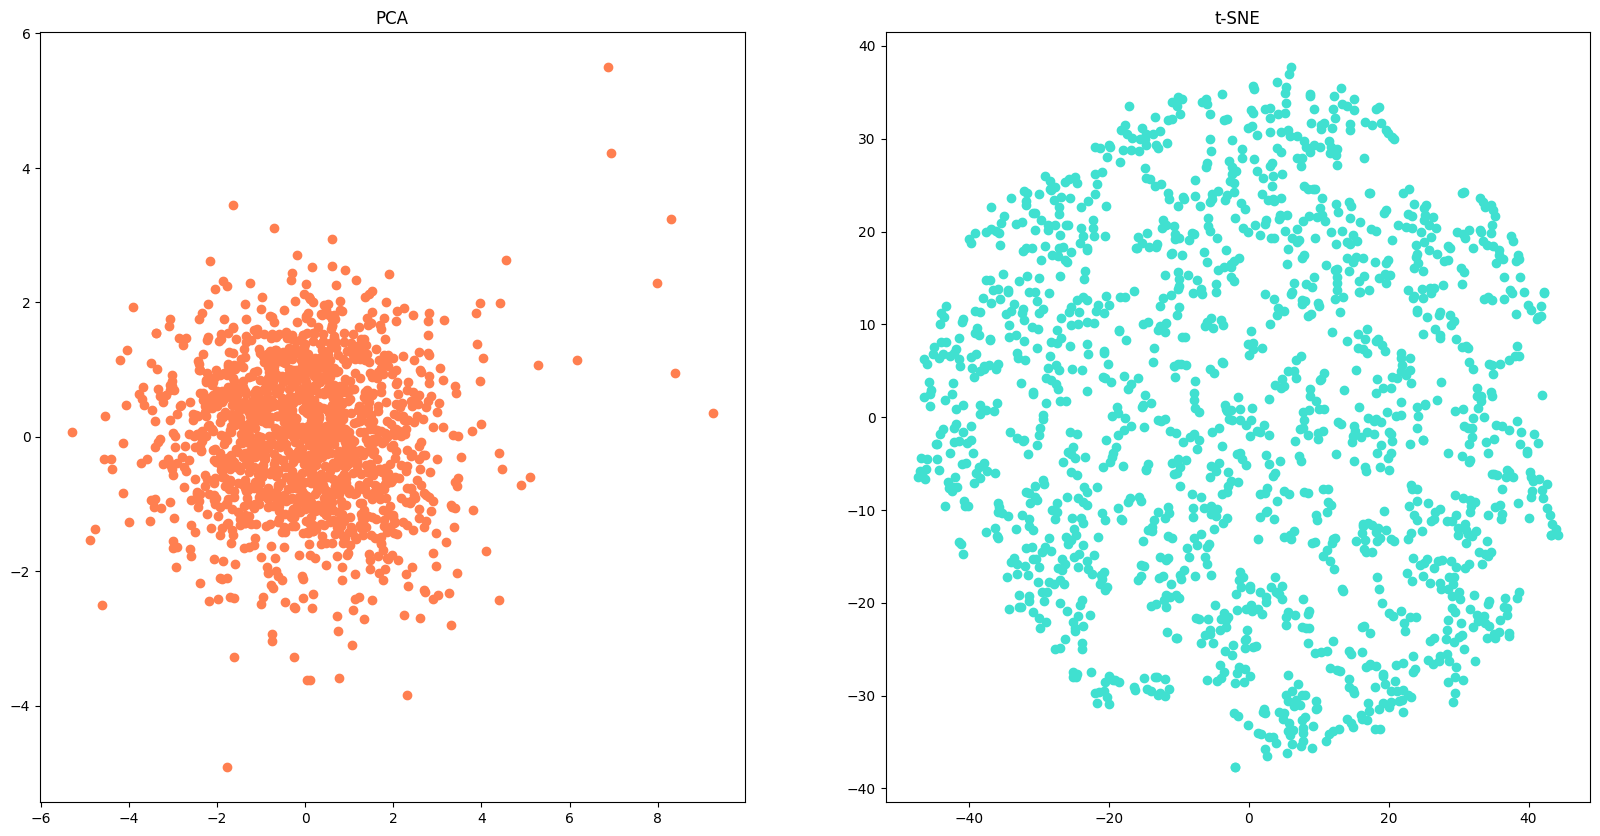

In [6]:
# Visualizando os dados utilizando o PCA e T-SNE

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop(['Correto'], axis=1))

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)

# Plotando os resultados
plt.figure(figsize=(20, 10))

# PCA
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='coral')
plt.title('PCA')

# t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], color='turquoise')
plt.title('t-SNE')

plt.show()

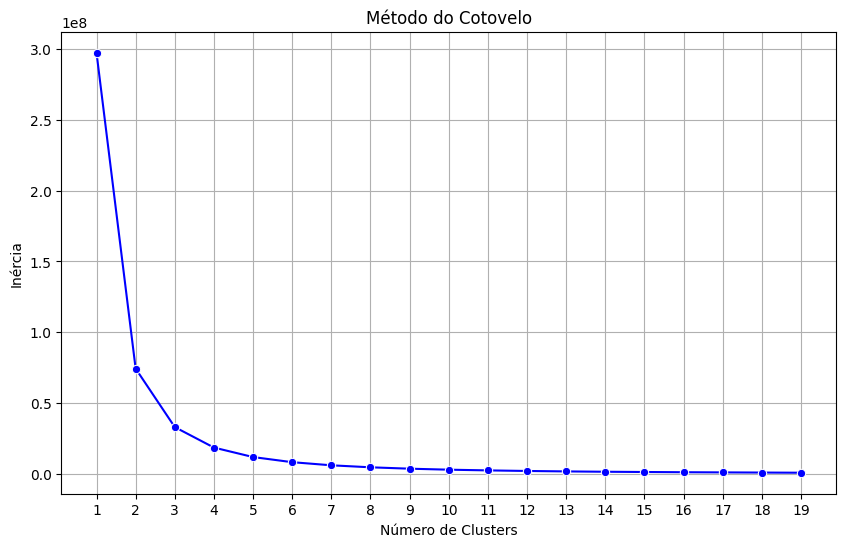

In [14]:
# Analizando o melhor quantidade de clusters com o metodo do cotovelo

x = df.drop(['Correto'], axis=1)
inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico de cotovelo
plt.figure(figsize=(10,6))
sns.lineplot(x=range(1, 20), y=inertia, marker='o', color='b')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

In [4]:
# Para cada valor de k, execute o K-means e visualize os agrupamentos
def clusters_plot(k_values: list[int], data, model) -> None:
    for k in k_values:
        # Executar K-means
        model_custom = model(n_clusters=k, max_iter=500)
        clusters = model_custom.fit_predict(data)
        
        # Reduzir a dimensionalidade com PCA
        pca = PCA(n_components=2, random_state=42)
        pca_result = pca.fit_transform(data)
        
        # Reduzir a dimensionalidade com t-SNE
        tsne = TSNE(n_components=2, random_state=42)
        tsne_result = tsne.fit_transform(data)
        
        # Plotar os resultados do PCA
        plt.figure(figsize=(20, 10))
        plt.subplot(1, 2, 1)
        plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='plasma')
        plt.title(f'PCA - K = {k}')
        plt.colorbar()
        
        # Plotar os resultados do t-SNE
        plt.subplot(1, 2, 2)
        plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='plasma')
        plt.title(f't-SNE - K = {k}')
        plt.colorbar()
        
        plt.tight_layout()
        plt.show()



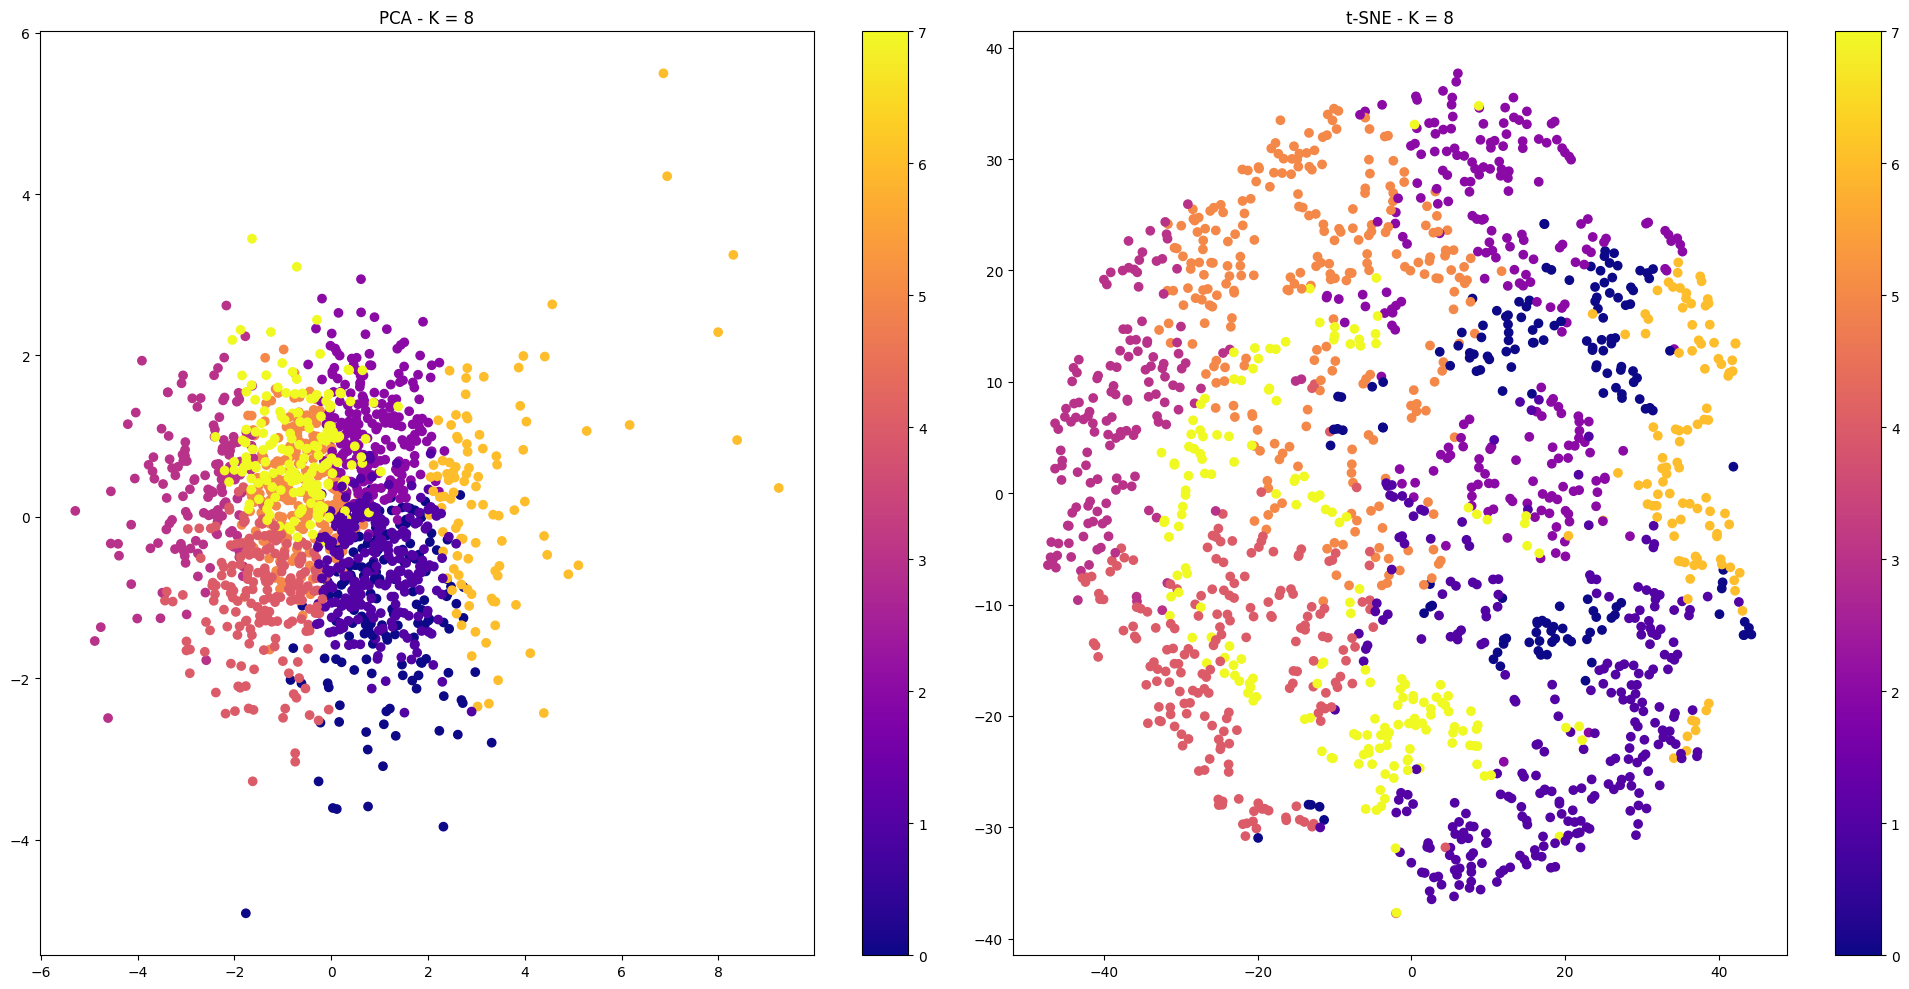

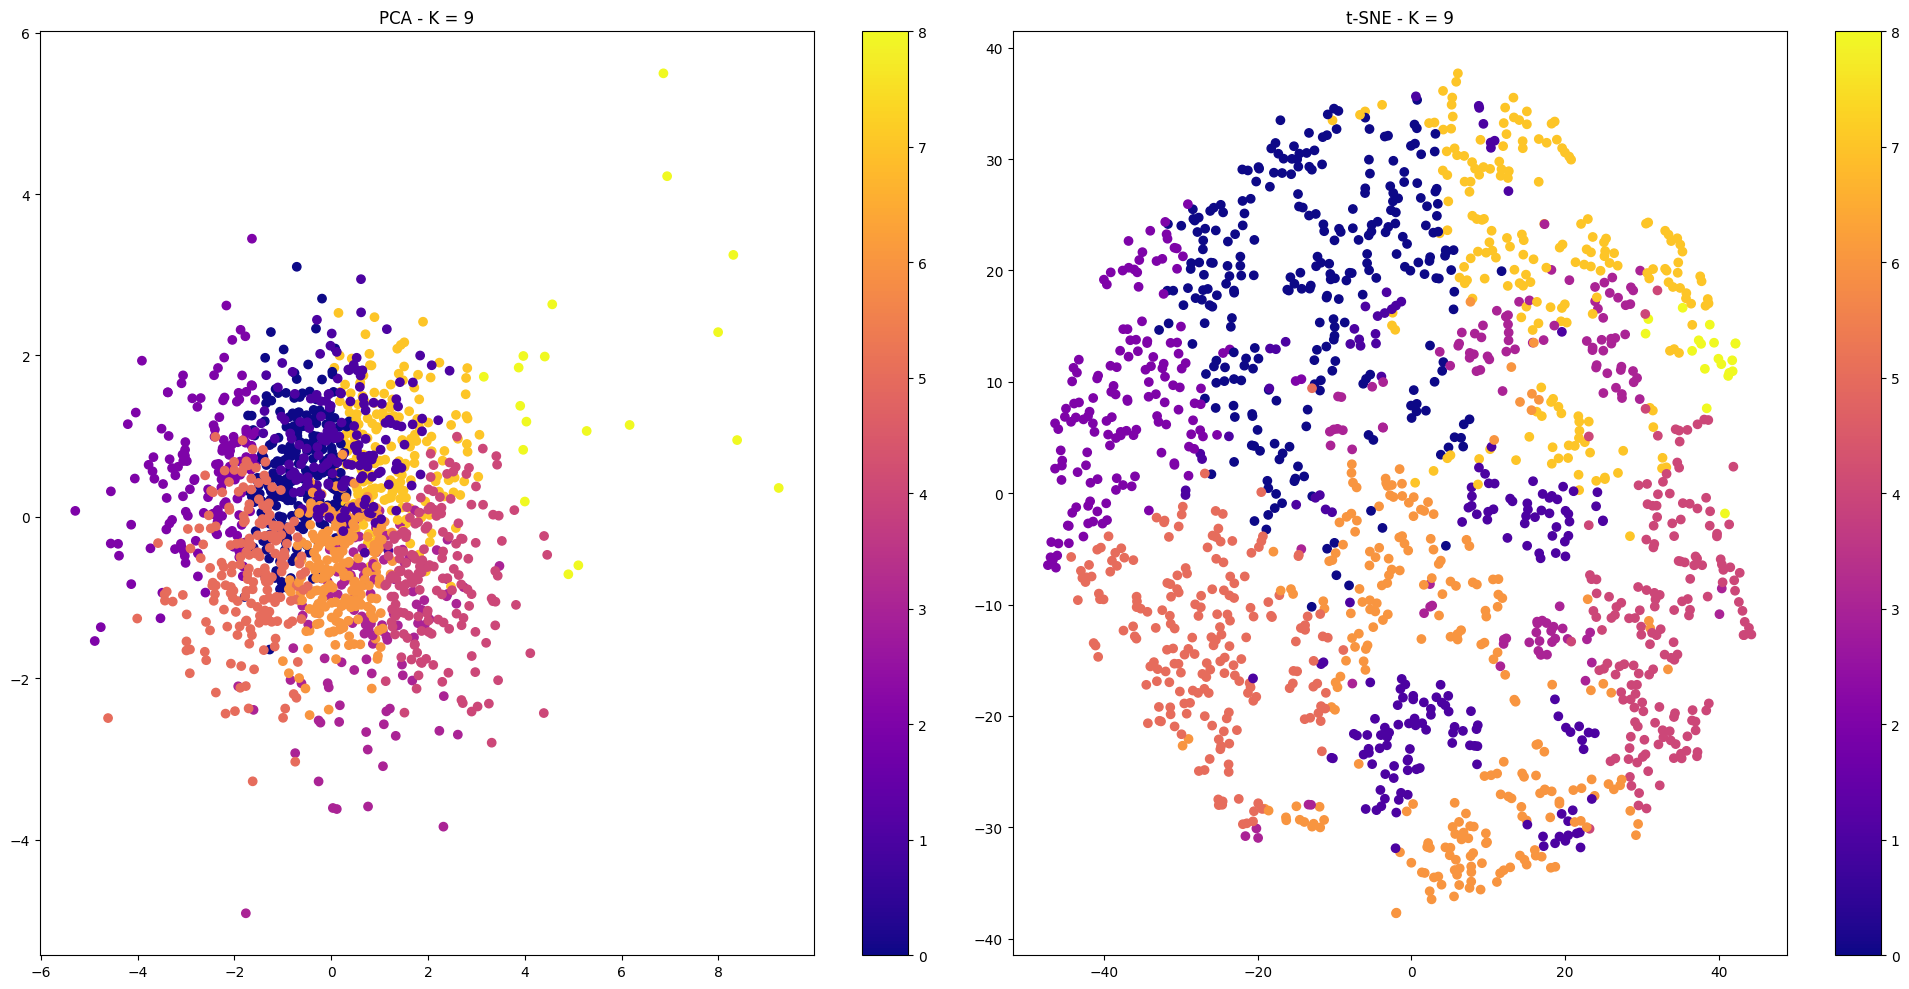

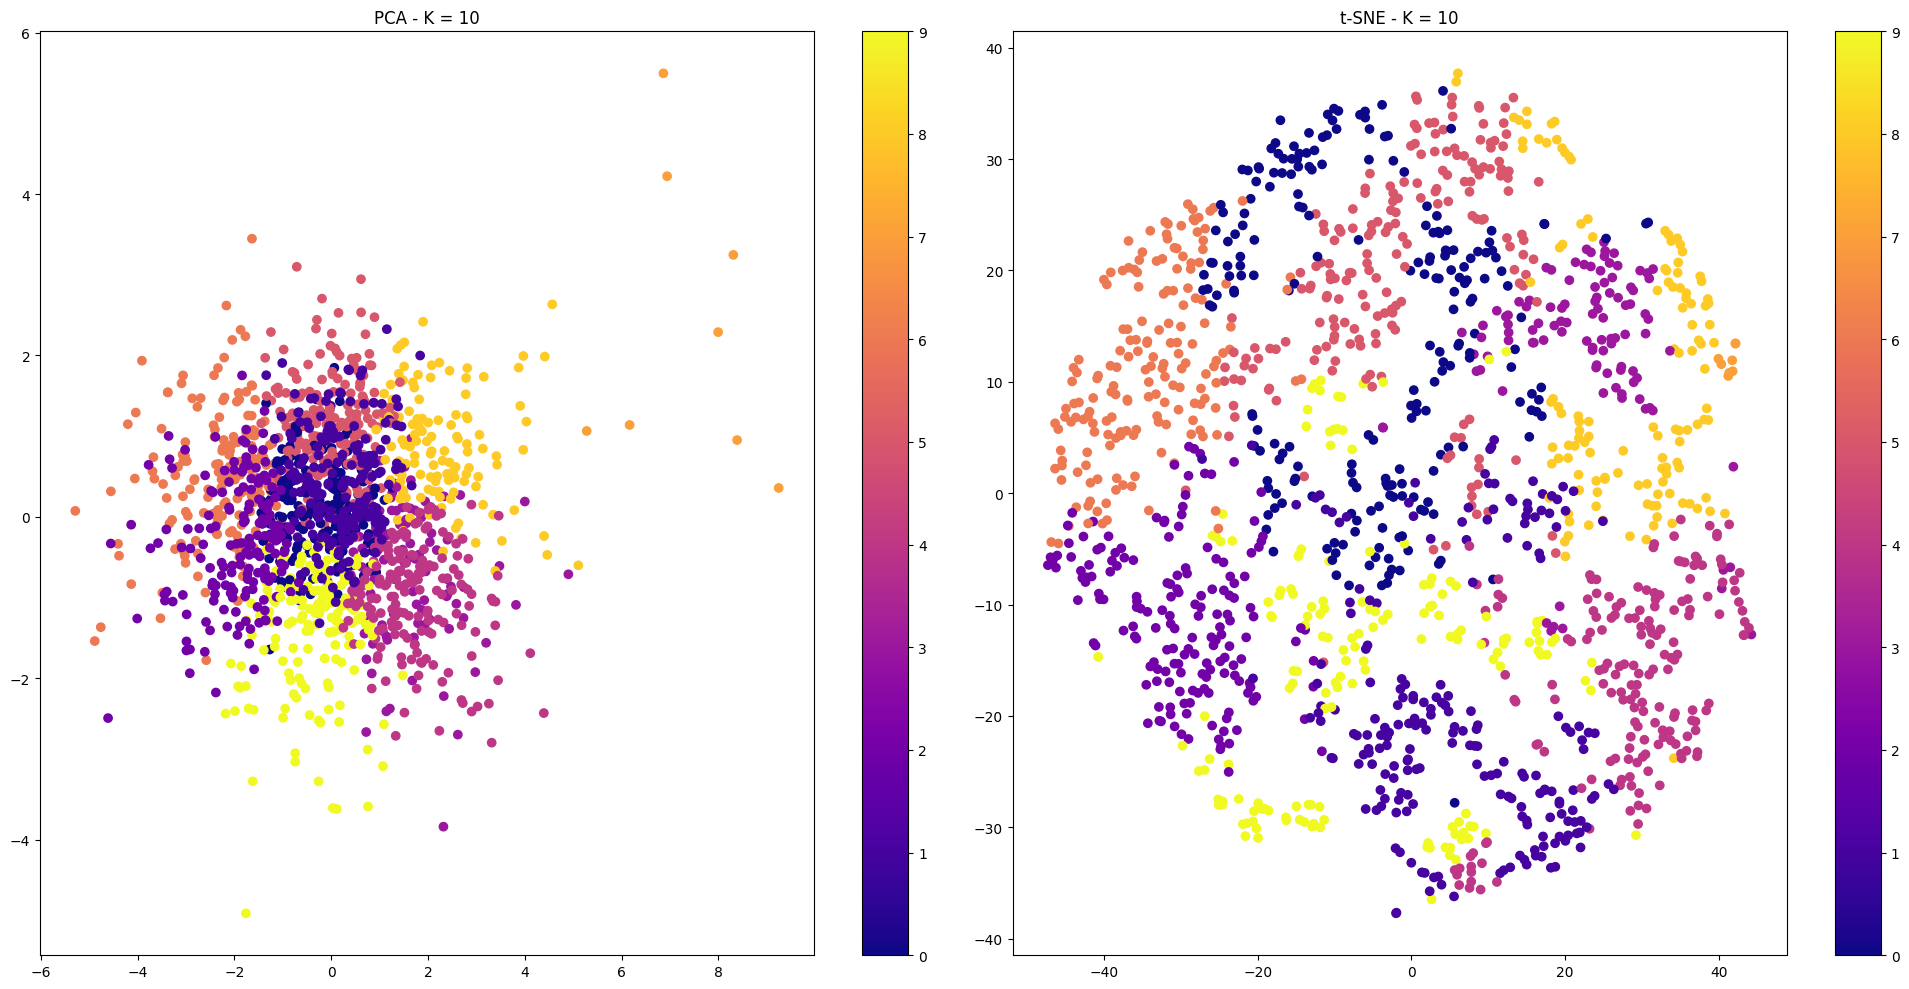

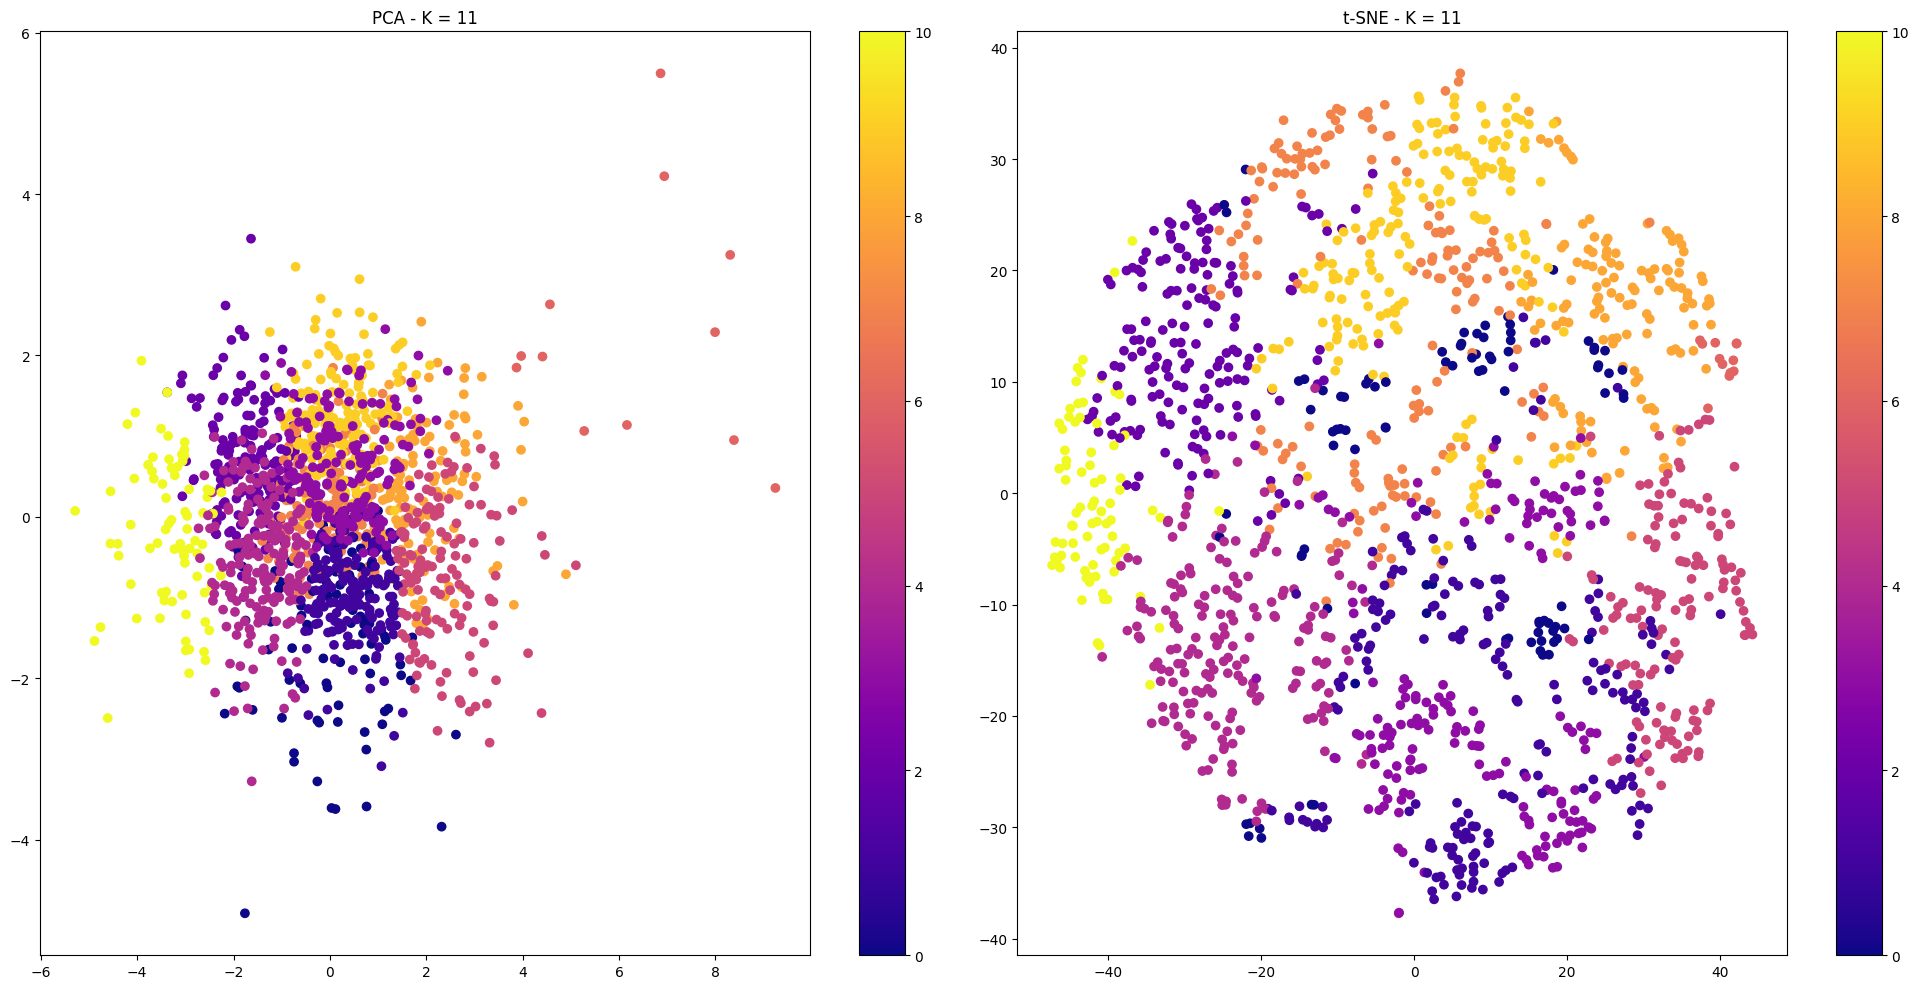

In [7]:
k_values = [8,9,10,11]
data = data_scaled
clusters_plot(k_values,data, KMeans)

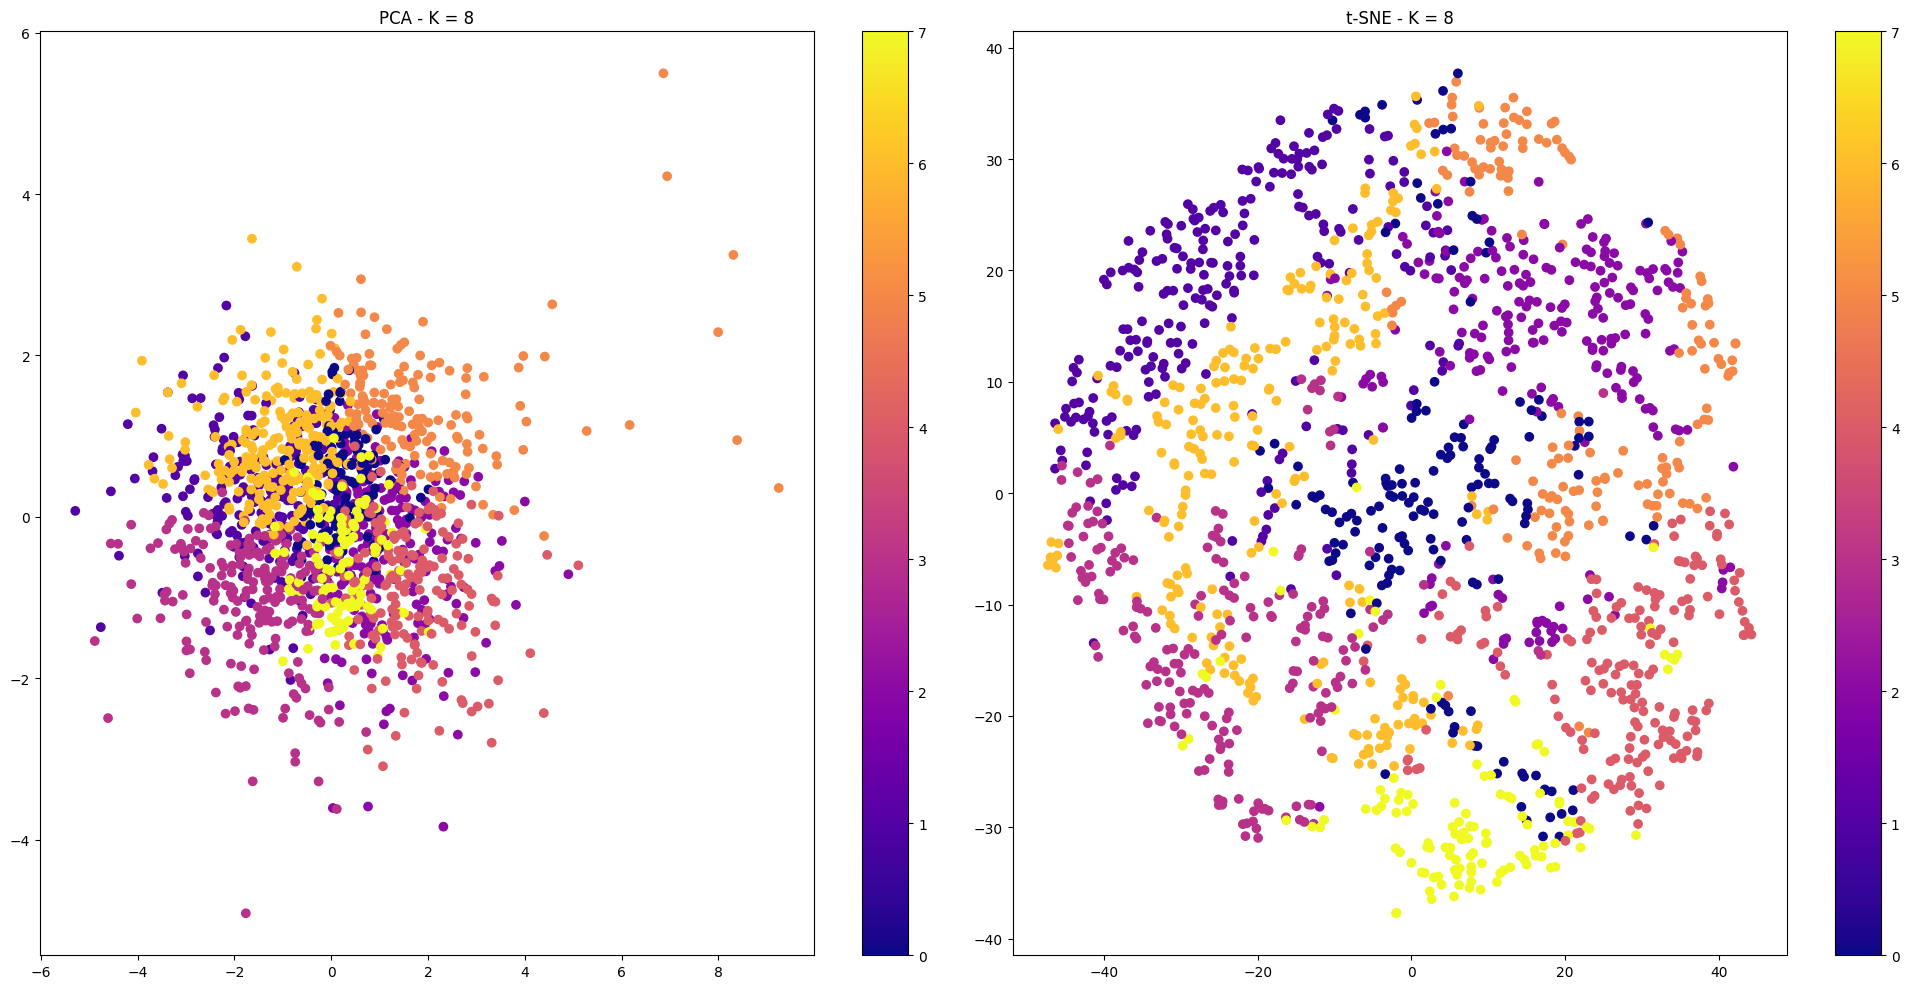

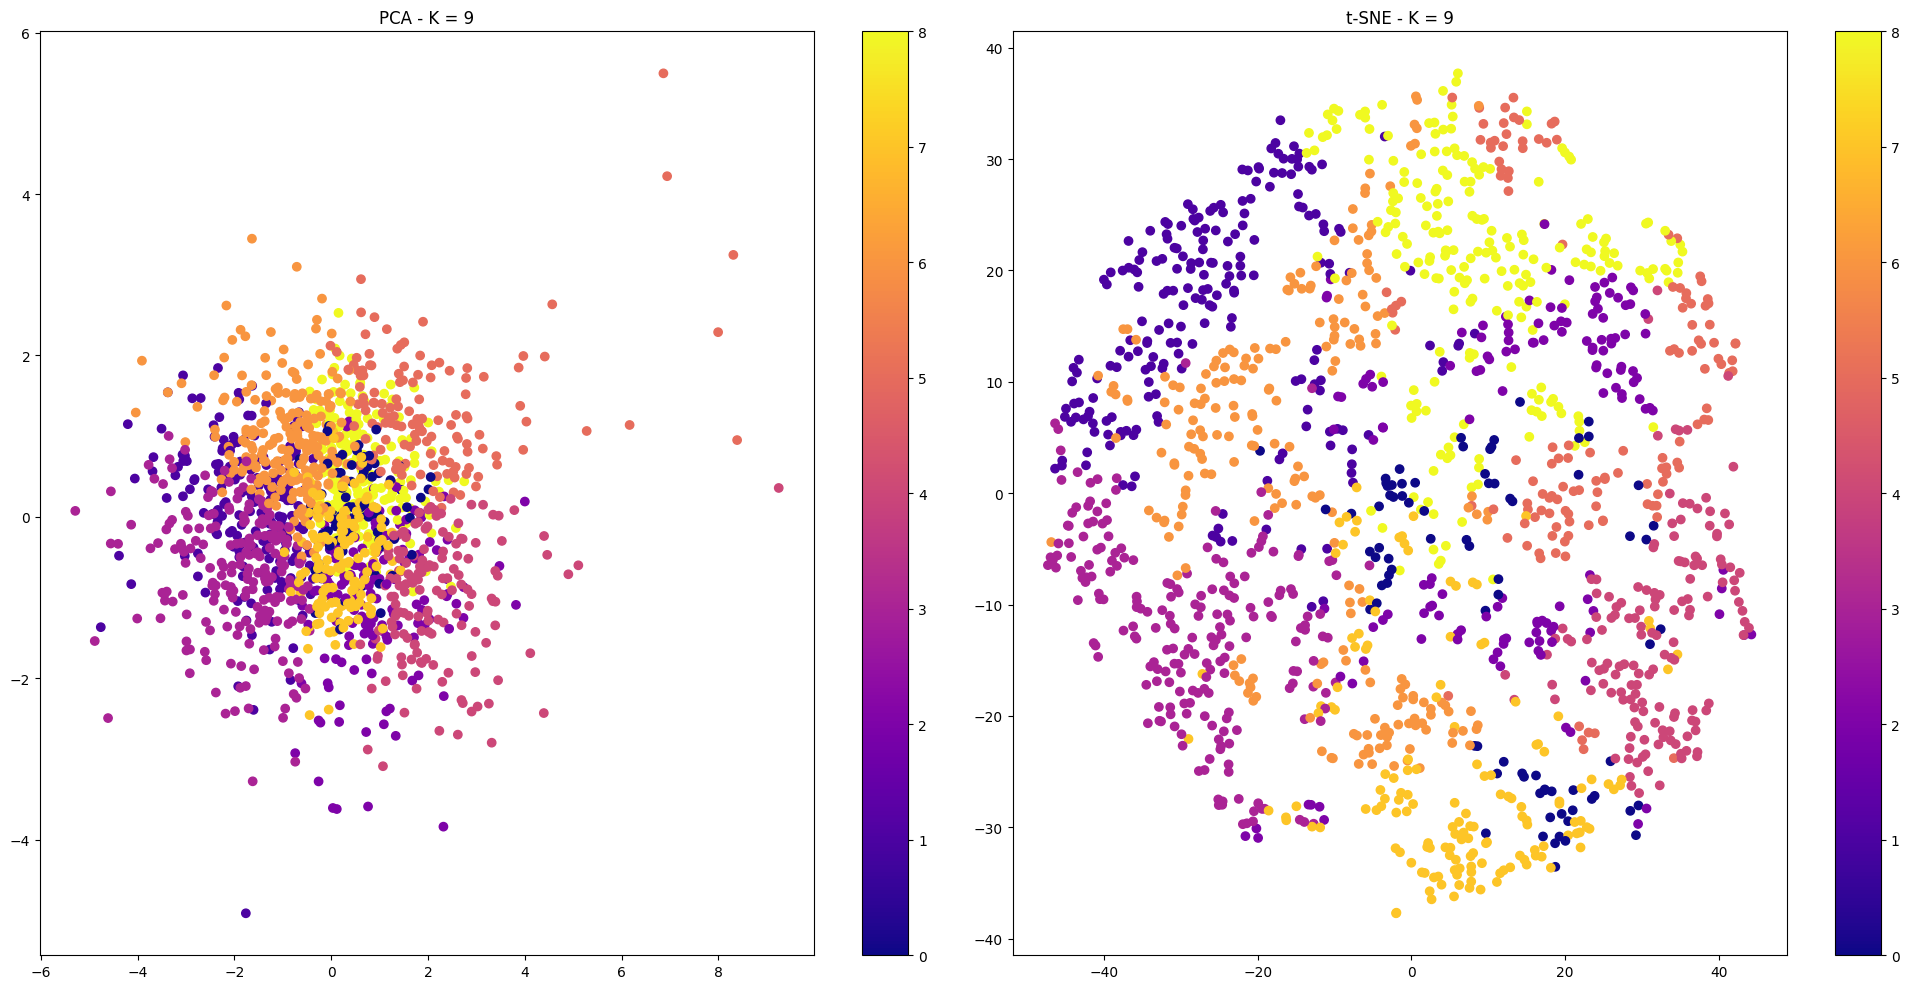

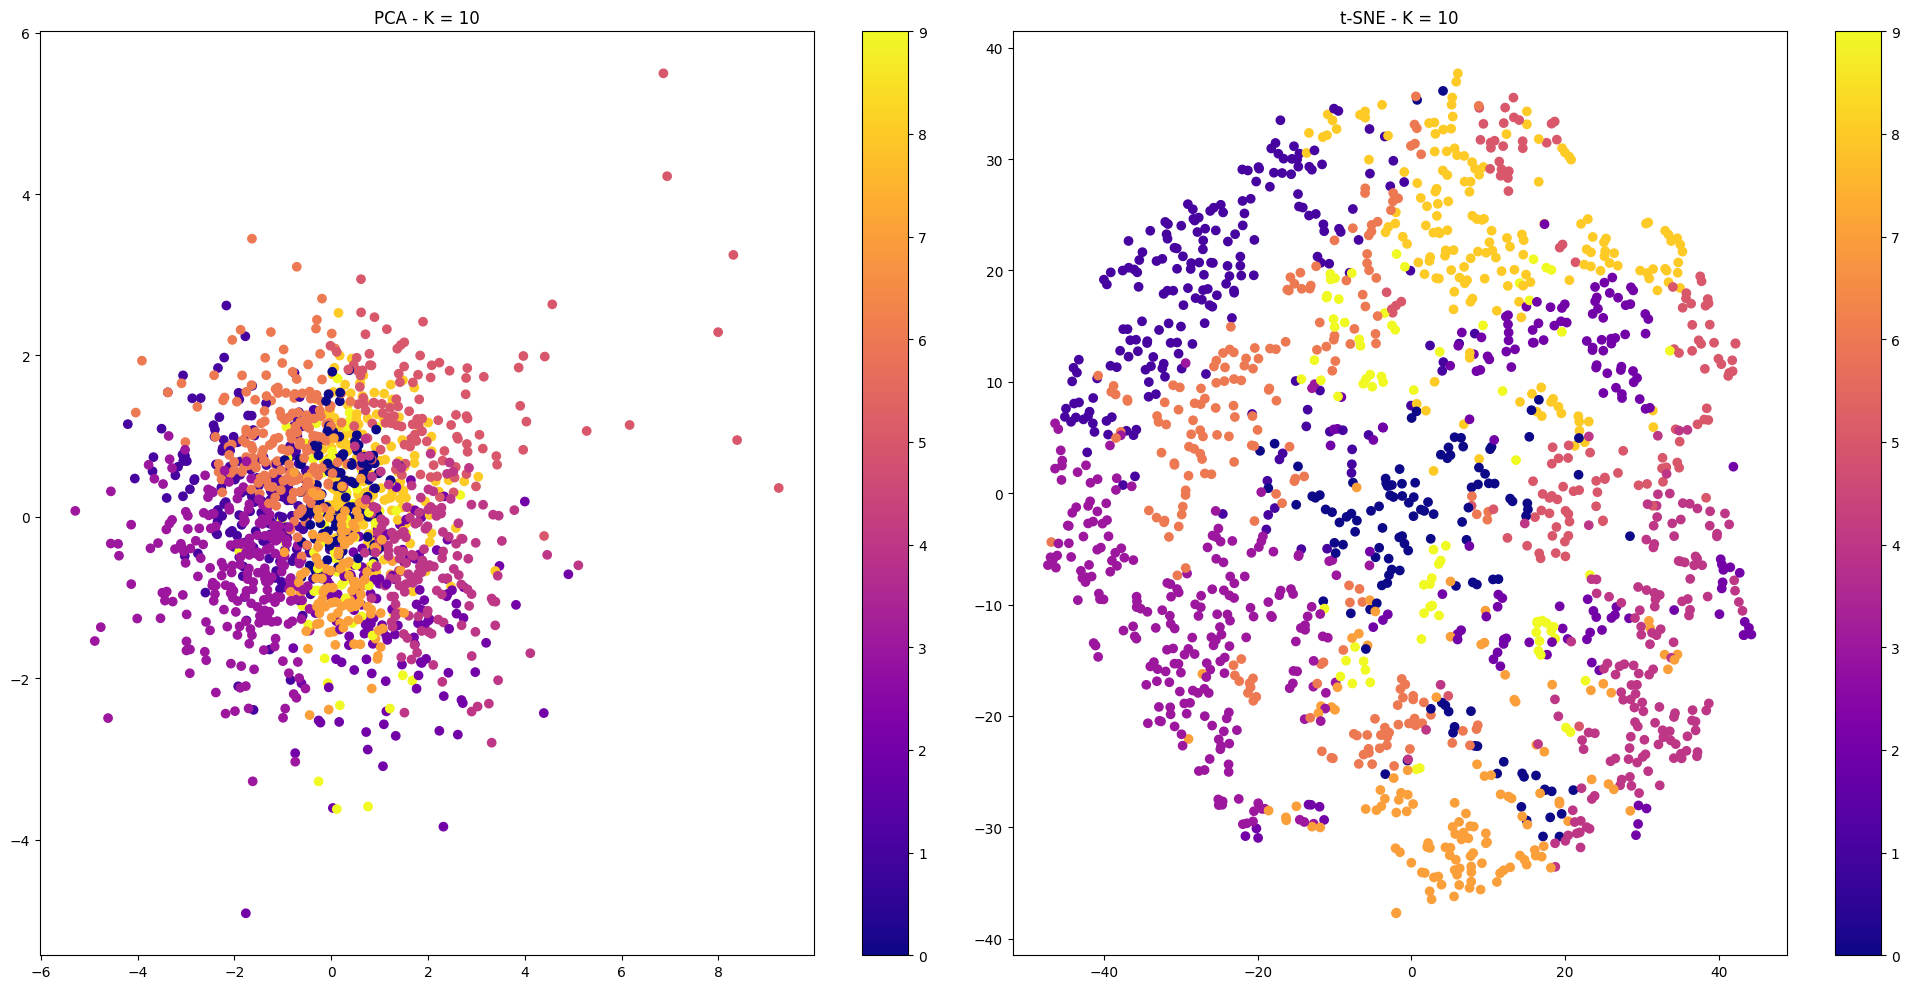

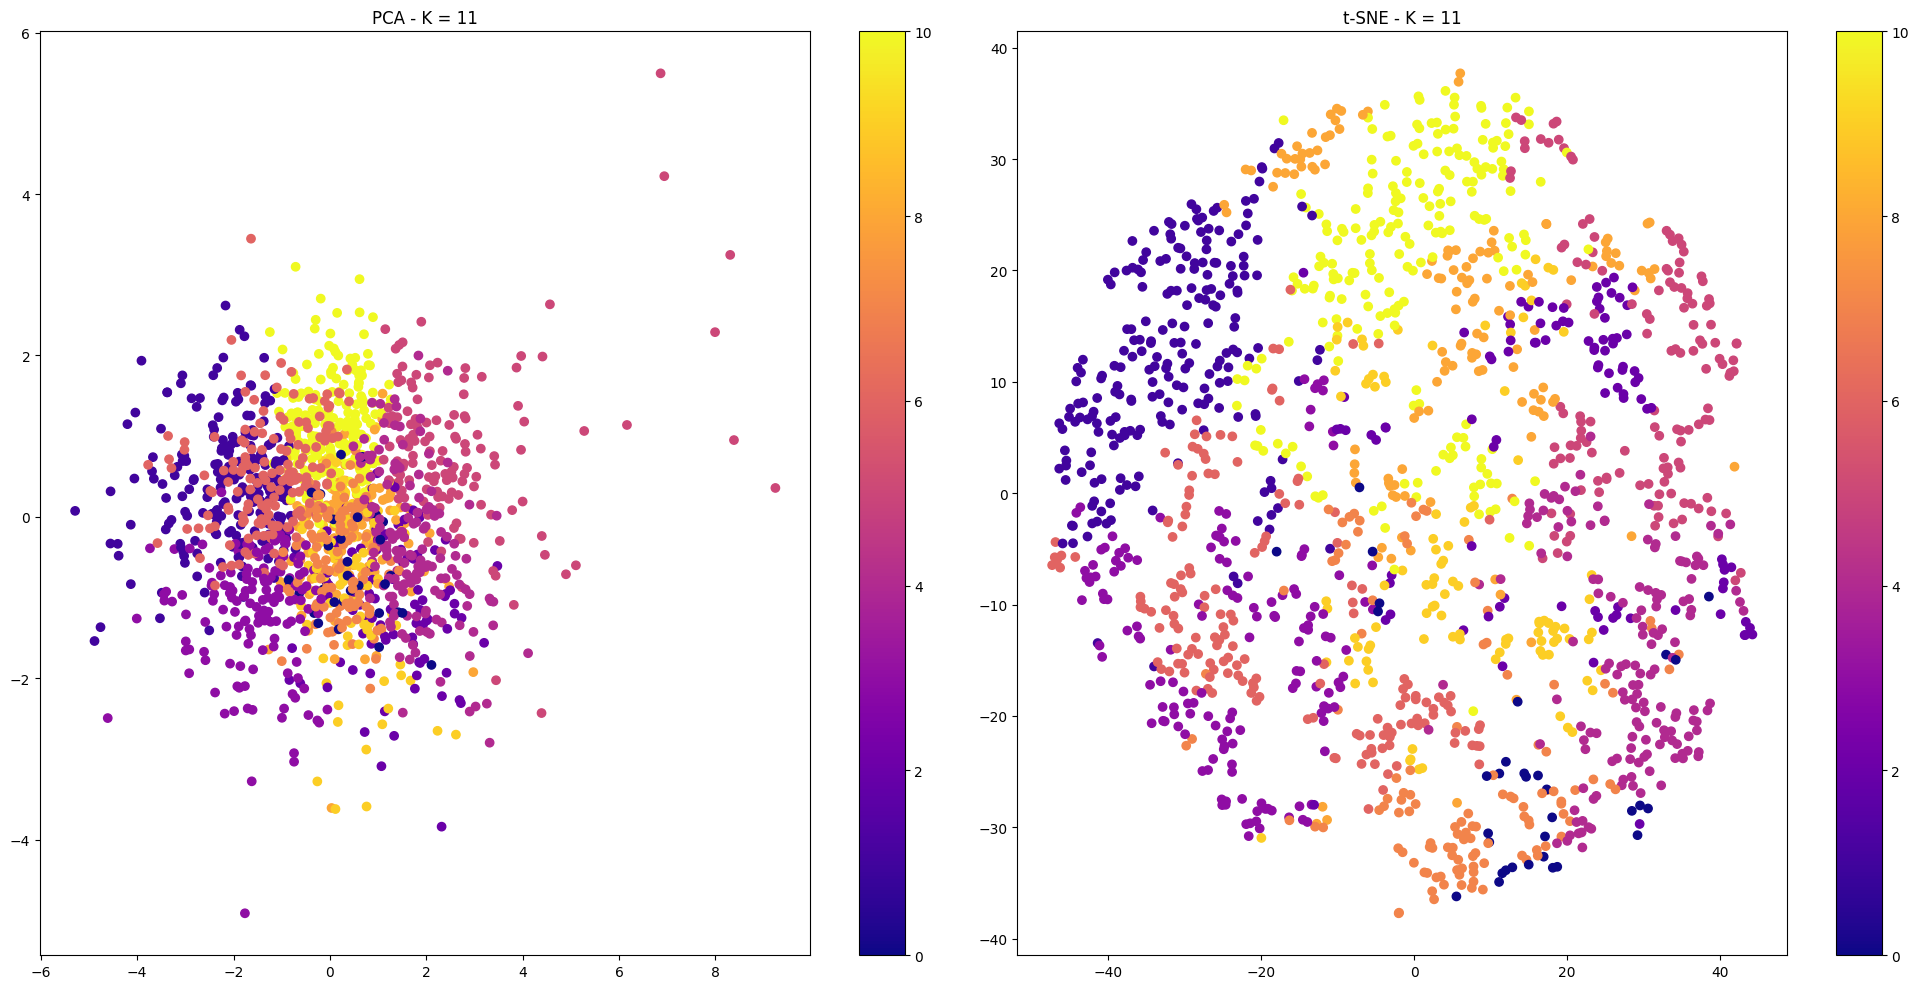

In [8]:
clusters_plot(k_values,data, KMedoids)